# Принятие решений в бизнесе на основе данных

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Данные для второй части
Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Шаг 1. Загрузите данные и подготовьте их к анализу <a id="some_id"></a>

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Получим общую информацию о данных:

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведём название столбцов к нижнему регистру

In [6]:
# <Приведение к нижнему регистру>
hypothesis.columns = map(str.lower, hypothesis.columns)

Приведем типы даты в необходимый формат для работы над ними.

In [7]:
# <Изменение формата данных>
orders['date'] = pd.to_datetime(orders['date'], format ='%Y-%m-%d' )
visitors['date'] = pd.to_datetime(visitors['date'], format ='%Y-%m-%d' )

### Шаг 2. Приоритизация гипотез

Изучим файл с гипотезами

In [8]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируем по убыванию

In [9]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending = False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Применим фреймворк RICE для приоритизации гипотез и отсортируем по убыванию

In [10]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending = False).round(2)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

По метрике RICE на первом месте гипотезы 7,2, 0 и 6, т.к. в отличии от ICE эта метрика учитывает охват (как много пользователей затронет гипотеза). Лидирующая метрика 8 в метрике ICE упала на 5 позицию поскольку имеет не такой большой охват по сравнению с гипотезами 7, 2, 0 и 6.

### Шаг 3. Анализ A/B-теста

#### 3.1 Кумулятивная выручка в разбивке по группам

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведем 5 значений
cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Объявем переменные cummulativeRevenueA и cummulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим график.

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

Построим графики накопления выручки в каждой группе

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


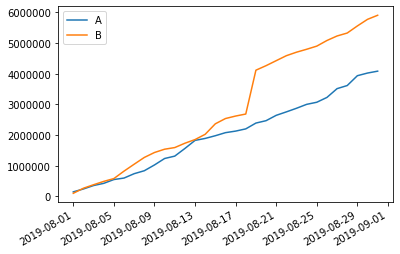

In [13]:
fig = plt.figure()

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

fig.autofmt_xdate()
plt.legend()

График кумулятивной выручки группы B в течении всего теста лежит выше, чем график кумулятивной выручки группы A.
Пользователи, посещающие сайт в версии "B", приносят нам больше денег.

#### 3.2 Кумулятивный средний чек в разбивке по группам

Для каждой группы построем графики кумулятивного среднего чека по дням.

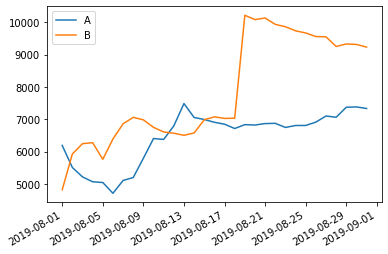

In [14]:
fig = plt.figure()

# Строим график
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')

fig.autofmt_xdate()
plt.legend()

По среднему чеку видно, что группа В сначала приносила больший среднний чек, а затем немножко просела. После наблюдается резкий скачок. Скорее всего это аномальные значения в группе В.

#### 3.3 Относительное изменение кумулятивного среднего чека группы B к группе A

Объеденим два датафрема - группу А и группу В, и на одном графике найдем соотношение среднего чека одной группы к другой.

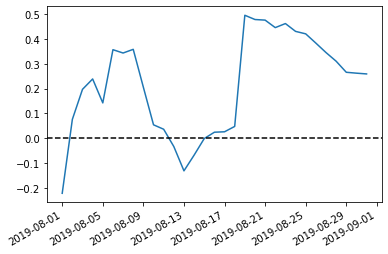

In [15]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig = plt.figure()
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
fig.autofmt_xdate()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

#### 3.4 График кумулятивной конверсии по группам

Произведем расчет конверсию каждой группы, разделив заказы на визиты и построим график каждой группы.

['2019-08-01', '2019-08-31', 0, 0.04]

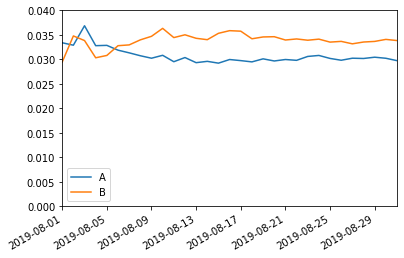

In [16]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
fig = plt.figure()
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
fig.autofmt_xdate()
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])

После начала теста конверсия группы В примерно до 6 мая ниже, чем у группы А. Далее она повышается и до конца всего теста находится выше, чем у группы А. В целом конверсия по группе B лучше, чем по А.

#### 3.5 Относительное изменение кумулятивной конверсии группы B к группе A

Объединим два датафрема конверсии группы А и В и построим график группы В к А.

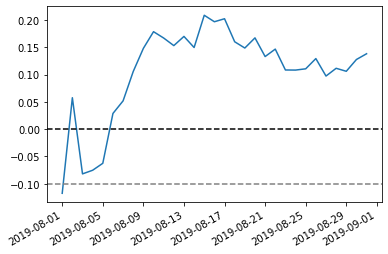

In [17]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим графики
fig = plt.figure()
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
fig.autofmt_xdate()
#plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

По графику накопительная конверсия по группе B практически на всем протяжении лежит значительно выше накопительной конверсии группы A.

#### 3.6 Точечный график количества заказов по пользователям

Найдем количество заказов пользователей в каждый день теста. Постороим точечный график распределения заказов.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

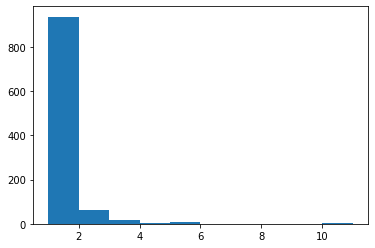

In [18]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

plt.hist(ordersByUsers['orders'])

Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2, 3 и более раза. построим график другого вида.

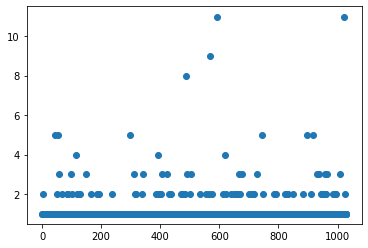

In [19]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 2 заказа — нормально или много? Ответим на этот вопрос, посчитав выборочные перцентили.

In [20]:
# считаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Из полученных данных можно сделать вывод, что только 5% пользователей от общего числа совершали 2 заказ. 1% процент пользователй совершал 4 заказа.

#### 3.7 Точечный график стоимостей заказов

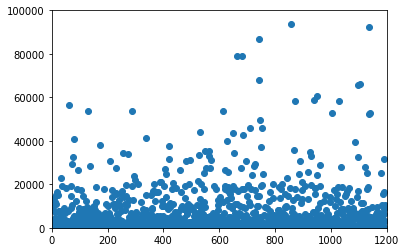

In [21]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(orders)))
plt.axis([0,1200,0,100000])
plt.scatter(x_values, orders['revenue'])

Заказов стоимостью свыше 20000 рублей не очень много. Есть выбросы в районе 50000 — 100000 рублей.
Посчитаем выборочные перцентили.

In [22]:
# считаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

По расчету можно сделать вывод - 5% пользователей от общего числа совершали заказ на сумму от 28000. 1% пользователей совершал заказ на сумму от 58233.

#### 3.8 Статистическая значимость различий в конверсии между группами по «сырым» данным. 

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Затем получим семпл каждой группы, вычев из количества поситетелей количество заказов. Проведем тест Уилкоксона-Манна-Уитни для нахождения статистической значимости конверсии между группами.

In [23]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(cummulativeData[cummulativeData['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(cummulativeData[cummulativeData['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.00733


In [24]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.144


- P-value равен 0,73%;
- Конверсия группы В выше конверсии группы А на 14%.

P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия.

#### 3.9 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проведем тест Уилкоксона-Манна-Уитни со средними чеками каждой группы.

In [25]:
cummulativeData.sample(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
13,2019-08-07,B,153,146,1049671,4644,0.032946
48,2019-08-25,A,451,409,3070704,14943,0.030181
11,2019-08-06,B,129,123,824337,3935,0.032783
58,2019-08-30,A,545,493,4022970,18037,0.030216


In [26]:
print("{0:.3f}".format(stats.mannwhitneyu(cummulativeData[cummulativeData['group']=='A']['revenue'],
                       cummulativeData[cummulativeData['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(cummulativeData[cummulativeData['group']=='B']
                       ['revenue'].mean()/cummulativeData[cummulativeData['group']=='A']['revenue'].mean()-1))

0.053
0.435


- P-value 5,3%, причин отвергать нулевую гипотезу нет. Различий между группами по среднему чеку нет. 
- Средний чек группы В на 43,5% больше, чем у группы А.  

По результатам теста мы можем сделать вывод о ошибке первого рода (отсутвиие различий групп и средний что чек группы В выше группы А почти на 44%). Далее отчистим данные от выбросов и проведем тесты повторно.

#### 3.9 Статистическая значимость различий в конверсии между группами по «очищенным» данным. 

Из вычисления перцентилей стоимости заказов и количества заказов очистим данные по параметрам:

- заказы на сумму более 30000
- количество заказов более 3.

Найдем количество аномальных пользователей.

In [27]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]
['visitorId'], ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
(55,)


55 аномальных пользователей. Далее очистим данные и проведем тест Уилкоксона-Манна-Уитни.

In [28]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(cummulativeData[cummulativeData['group']=='A']['visitors'].sum() -
len(ordersByUsersA['orders'])))],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(cummulativeData[cummulativeData['group']=='B']['visitors'].sum() -
len(ordersByUsersB['orders'])))],axis=0)

In [29]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.008
0.164


- P-value 0,8%, что меньше порога 5%;
- Конверсия группы B выше конверсии группы А на 16,4%.

На основании этого можно сделать вывод, что у групп А и В действительно разная конверсия.

#### 3.10 Статистическая значимость различий в среднем чеке заказа между группами по « «очищенным» данным.

Проведем тест Уилкоксона-Манна-Уитни по статистичкой значимости средних чеков по « «очищенным» данным.

In [30]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.462
-0.024


- P-value 46,2%. Гипотезу о равенстве средних чеков двух группу принимаем;
- Разница между средними чеками отсутствует.

### 4. Примите решение по результатам теста и объясните его

Варианты решений:
- 1. Остановить тест, зафиксировать победу одной из групп.
- 2. Остановить тест, зафиксировать отсутствие различий между группами.
- 3. Продолжить тест.

#### Результаты теста:

Сырые данные:

Конверсия: P-value 0,73%, конверсия группы В выше конверсии группы А на 14%  
Средний чек: P-value 5,3%, cредний чек группы В на 43,5% больше, чем у группы А.     


Очищеные данные:  

Конверсия: P-value 0,8%, конверсия группы В выше конверсии группы А на 16,4%  
Средний чек: P-value 46,2%, разница между средними чеками отсутствует.


Конверсия группы В в целом выше конверсии группы А на 16,4%. Так же после очистки данных от аномальных значений было выявлено, что различий в среднем чеке нет. На основании всего этого можно сделать вывод номер об остановке теста и зафиксировать отсутствие различий между группами.

### 5. Вывод

По проведенном анализу установлено различие методов ICE и RICE в способе приоритезации гипотез. Метод ICE не учитывает охват аудитории гипотезы и из-за этого приоритезация гипотез изменяется.

Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.